In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Càrrega de les dades del partit professional

In [24]:
import pandas as pd

# Replace with the correct path to your CSV file
file_path = '/content/drive/My Drive/dataMen.csv'

# Load the CSV file
df = pd.read_csv(file_path)

df

,Unnamed: 0,frame,time,role1,x1,y1,role2,x2,y2,role3,...,speed4y,shot,targetx,targety,fromx,fromy,duration,shot_full,lastHit,rally
0,0,203630,0.000000,opponent,4.037764,14.620030,opponent,3.892834,19.750000,teammate,...,0.251349,normal,8.247875,1.011825,3.892834,19.75,1.2,Serve,T,1
1,1,203631,0.033333,opponent,4.031252,14.613072,opponent,5.000120,18.519180,teammate,...,1.427157,undef,0.000000,0.000000,0.000000,0.00,0.0,NaN,T,1
2,2,203632,0.066667,opponent,4.032626,14.478014,opponent,5.024977,18.492200,teammate,...,1.040307,undef,0.000000,0.000000,0.000000,0.00,0.0,NaN,T,1
3,3,203633,0.100000,opponent,4.030416,14.391606,opponent,5.025385,18.376925,teammate,...,-1.329279,undef,0.000000,0.000000,0.000000,0.00,0.0,NaN,T,1
4,4,203634,0.133333,opponent,4.029419,14.464987,opponent,5.058773,18.006418,teammate,...,-0.037626,undef,0.000000,0.000000,0.000000,0.00,0.0,NaN,T,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17230,17230,322509,2.400000,receiver,2.640764,16.356873,teammate,6.016663,14.405724,opponent,...,-0.231555,undef,0.000000,0.000000,0.000000,0.00,0.0,NaN,B,120
17231,17231,322510,2.433333,receiver,2.595229,16.797160,teammate,6.029272,14.416456,opponent,...,0.983607,undef,0.000000,0.000000,0.000000,0.00,0.0,NaN,B,120
17232,17232,322511,2.466667,receiver,2.645359,17.262760,teammate,6.032070,14.393478,opponent,...,3.971286,undef,0.000000,0.000000,0.000000,0.00,0.0,NaN,B,120
17233,17233,322512,2.500000,receiver,2.712842,17.376913,teammate,6.040019,14.375631,opponent,...,-0.439383,undef,0.000000,0.000000,0.000000,0.00,0.0,NaN,B,120


# Preprocessat de les dades

Cal eliminar aquelles files que només contenen informació interpolada.

In [25]:
df_cleaned = df[df['shot'] != 'undef']
df_cleaned.reset_index(drop=True, inplace=True)

Cal també generar les metavariables decidides i la variable resposta.

In [26]:
import math

df_cleaned['distToCenter'] = None
df_cleaned['avgDistToOpponent'] = None
df_cleaned['opponent1x'] = None
df_cleaned['opponent1y'] = None
df_cleaned['opponent2x'] = None
df_cleaned['opponent2y'] = None

def getDist(ax, ay, bx, by):
  return math.sqrt(pow(ax - bx, 2) + pow(ay - by, 2))

def enterOppData(index, nOpps, x, y):
  if nOpps == 1:
    df_cleaned.at[index, 'opponent1x'] = x
    df_cleaned.at[index, 'opponent1y'] = y
  else:
    df_cleaned.at[index, 'opponent2x'] = x
    df_cleaned.at[index, 'opponent2y'] = y


for index, row in df_cleaned.iterrows():
  df_cleaned.at[index, 'distToCenter'] = min(getDist(row['targetx'], row['targety'], 5, 5), getDist(row['targetx'], row['targety'], 5, 15))

  sumDistToOpponents = 0
  nOpps = 0
  if row['role1'] == 'teammate' or row['role1'] == 'receiver':
    nOpps += 1
    sumDistToOpponents += getDist(row['targetx'], row['targety'], row['x1'], row['y1'])
    enterOppData(index, nOpps, row['x1'], row['y1'])
  if row['role2'] == 'teammate' or row['role2'] == 'receiver':
    nOpps += 1
    sumDistToOpponents += getDist(row['targetx'], row['targety'], row['x2'], row['y2'])
    enterOppData(index, nOpps, row['x2'], row['y2'])
  if row['role3'] == 'teammate' or row['role3'] == 'receiver':
    nOpps += 1
    sumDistToOpponents += getDist(row['targetx'], row['targety'], row['x3'], row['y3'])
    enterOppData(index, nOpps, row['x3'], row['y3'])
  if row['role4'] == 'teammate' or row['role4'] == 'receiver':
    nOpps += 1
    sumDistToOpponents += getDist(row['targetx'], row['targety'], row['x4'], row['y4'])
    enterOppData(index, nOpps, row['x4'], row['y4'])

  df_cleaned.at[index, 'avgDistToOpponent'] = sumDistToOpponents / 2.0

<ipython-input-26-77d60fb0b5da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['distToCenter'] = None
<ipython-input-26-77d60fb0b5da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['avgDistToOpponent'] = None
<ipython-input-26-77d60fb0b5da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [27]:
df_cleaned

,Unnamed: 0,frame,time,role1,x1,y1,role2,x2,y2,role3,...,duration,shot_full,lastHit,rally,distToCenter,avgDistToOpponent,opponent1x,opponent1y,opponent2x,opponent2y
0,0,203630,0.000000,opponent,4.037764,14.620030,opponent,3.892834,19.750000,teammate,...,1.200000,Serve,T,1,5.143368,3.318083,2.314318,2.259889,8.51568,1.518132
1,33,203666,1.200000,receiver,4.272186,14.044063,teammate,6.694923,15.088632,opponent,...,0.800000,R,B,1,1.039957,1.379094,4.272186,14.044063,6.694923,15.088632
2,57,203690,2.000000,opponent,4.282609,14.247098,opponent,7.449125,13.755092,receiver,...,1.466667,VR,T,1,3.274425,2.959014,2.199809,2.387742,8.042233,1.584097
3,101,203734,3.466667,receiver,3.594351,13.422606,teammate,6.659068,13.583051,opponent,...,0.633333,D,B,1,2.110516,1.895251,3.594351,13.422606,6.659068,13.583051
4,120,203753,4.100000,opponent,3.304529,13.743157,opponent,6.691191,13.761337,teammate,...,1.200000,VD,T,1,3.989821,2.079504,3.669009,1.865631,7.563317,2.155343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,17036,321518,8.733333,teammate,2.883372,13.625797,receiver,5.806935,13.713493,opponent,...,1.066667,CP,B,119,3.050066,2.685302,2.883372,13.625797,5.806935,13.713493
565,17067,321550,9.800000,opponent,3.419716,13.232951,opponent,6.498573,12.343464,receiver,...,1.300000,VR,T,119,2.447099,3.586264,1.097649,1.540979,7.582462,3.176111
566,17106,321589,11.100000,teammate,3.356743,13.447385,receiver,6.788662,13.199900,opponent,...,1.733333,D,B,119,4.805757,6.236571,3.356743,13.447385,6.788662,13.1999
567,17159,322437,0.000000,opponent,1.860181,13.852635,opponent,6.933810,18.750124,receiver,...,0.933333,Serve,T,120,4.974447,3.443303,1.514152,1.525762,6.656174,2.975104


In [28]:
df_cleaned['hasWon'] = None
currentRally = -1
previousRowHasWon = False;

for index, row in reversed(list(df_cleaned.iterrows())):
  df_cleaned.at[index, 'hasWon'] = (row['rally'] != currentRally) or not previousRowHasWon
  currentRally = row['rally']
  previousRowHasWon = df_cleaned.at[index, 'hasWon']

df_cleaned

<ipython-input-28-849e53cee0bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hasWon'] = None


,Unnamed: 0,frame,time,role1,x1,y1,role2,x2,y2,role3,...,shot_full,lastHit,rally,distToCenter,avgDistToOpponent,opponent1x,opponent1y,opponent2x,opponent2y,hasWon
0,0,203630,0.000000,opponent,4.037764,14.620030,opponent,3.892834,19.750000,teammate,...,Serve,T,1,5.143368,3.318083,2.314318,2.259889,8.51568,1.518132,True
1,33,203666,1.200000,receiver,4.272186,14.044063,teammate,6.694923,15.088632,opponent,...,R,B,1,1.039957,1.379094,4.272186,14.044063,6.694923,15.088632,False
2,57,203690,2.000000,opponent,4.282609,14.247098,opponent,7.449125,13.755092,receiver,...,VR,T,1,3.274425,2.959014,2.199809,2.387742,8.042233,1.584097,True
3,101,203734,3.466667,receiver,3.594351,13.422606,teammate,6.659068,13.583051,opponent,...,D,B,1,2.110516,1.895251,3.594351,13.422606,6.659068,13.583051,False
4,120,203753,4.100000,opponent,3.304529,13.743157,opponent,6.691191,13.761337,teammate,...,VD,T,1,3.989821,2.079504,3.669009,1.865631,7.563317,2.155343,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,17036,321518,8.733333,teammate,2.883372,13.625797,receiver,5.806935,13.713493,opponent,...,CP,B,119,3.050066,2.685302,2.883372,13.625797,5.806935,13.713493,True
565,17067,321550,9.800000,opponent,3.419716,13.232951,opponent,6.498573,12.343464,receiver,...,VR,T,119,2.447099,3.586264,1.097649,1.540979,7.582462,3.176111,False
566,17106,321589,11.100000,teammate,3.356743,13.447385,receiver,6.788662,13.199900,opponent,...,D,B,119,4.805757,6.236571,3.356743,13.447385,6.788662,13.1999,True
567,17159,322437,0.000000,opponent,1.860181,13.852635,opponent,6.933810,18.750124,receiver,...,Serve,T,120,4.974447,3.443303,1.514152,1.525762,6.656174,2.975104,False


In [29]:
df = df_cleaned

Algunes dades poden estar en el format incorrecte:

In [30]:
# Step 1: Check data types before conversion
print(df.dtypes)

# Step 2: Convert columns to numeric, coercing any errors
df['distToCenter'] = pd.to_numeric(df['distToCenter'], errors='coerce')
df['avgDistToOpponent'] = pd.to_numeric(df['avgDistToOpponent'], errors='coerce')
df['opponent1x'] = pd.to_numeric(df['opponent1x'], errors='coerce')
df['opponent1y'] = pd.to_numeric(df['opponent1y'], errors='coerce')
df['opponent2x'] = pd.to_numeric(df['opponent2x'], errors='coerce')
df['opponent2y'] = pd.to_numeric(df['opponent2y'], errors='coerce')
df['hasWon'] = pd.to_numeric(df['hasWon'], errors='coerce')

# Step 3: Verify the data types after conversion
print(df.dtypes)

Unnamed: 0             int64
frame                  int64
time                 float64
role1                 object
x1                   float64
y1                   float64
role2                 object
x2                   float64
y2                   float64
role3                 object
x3                   float64
y3                   float64
role4                 object
x4                   float64
y4                   float64
ballx                float64
bally                float64
speed1x              float64
speed1y              float64
speed2x              float64
speed2y              float64
speed3x              float64
speed3y              float64
speed4x              float64
speed4y              float64
shot                  object
targetx              float64
targety              float64
fromx                float64
fromy                float64
duration             float64
shot_full             object
lastHit               object
rally                  int64
distToCenter  

<ipython-input-30-58851069464a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distToCenter'] = pd.to_numeric(df['distToCenter'], errors='coerce')
<ipython-input-30-58851069464a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avgDistToOpponent'] = pd.to_numeric(df['avgDistToOpponent'], errors='coerce')
<ipython-input-30-58851069464a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

# Entrenament de models

In [31]:
!pip install pandas scikit-learn

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Molts dels models requereixen la normalització de les variables per un funcionament correcte. Particiono les dades reservant un 10\% per al test, i entreno quatre models de classes diferents per veure quin és capaç de fer més bones prediccions.

In [33]:
from sklearn.preprocessing import StandardScaler

# Step 3: Define Features and Target
X = df[['targetx', 'targety', 'opponent1x', 'opponent1y', 'opponent2x', 'opponent2y', 'distToCenter', 'avgDistToOpponent']]
y = df['hasWon'].astype(int)  # Convert to integer if necessary (True/False -> 1/0)

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Scaler means: ")
print(scaler.mean_)
print("Scaler stds: ")
print(scaler.scale_)

# Step 5: Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Step 6: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=31)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 7: XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Step 8: Support Vector Machine Model
svm_model = SVC(probability=True)  # Set probability=True to enable probability estimates
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Scaler means: 
[ 5.02322944 10.33501416  2.8924869  10.04240865  7.11457666  9.95079576
  3.46423334  3.24512865]
Scaler stds: 
[2.54100181 6.27431431 0.92454804 6.17883368 0.90075378 6.13064176
 1.22743165 1.76744962]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:31:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
# Step 9: Evaluate All Models
def evaluate_model(y_true, y_pred, model_name):
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred))
    print('---')

# Evaluate all models
evaluate_model(y_test, y_pred_log_reg, 'Logistic Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')
evaluate_model(y_test, y_pred_svm, 'Support Vector Machine')

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        24
           1       0.67      0.73      0.70        33

    accuracy                           0.63        57
   macro avg       0.62      0.61      0.61        57
weighted avg       0.63      0.63      0.63        57

---
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41        24
           1       0.59      0.67      0.63        33

    accuracy                           0.54        57
   macro avg       0.52      0.52      0.52        57
weighted avg       0.53      0.54      0.54        57

---
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        24
           1       0.60      0.64      0.62        33

    accuracy                           0.54        57
   macro 

Sembla que la regressió logística és el model que ha tingut un millor rendiment a la partició de test. En general la precisió dels models no és gaire bona, però era d'esperar perquè és difícil saber qui guanya el punt només amb una interacció.

In [35]:
log_reg_model.coef_

array([[ 0.1525458 , -0.08701252,  0.002568  , -0.33270165, -0.09744751,
         0.56407622, -0.15250379,  0.00622473]])

És una bona idea provar de trobar els millors hiperparàmetres de la regressió logística, aplicant regularització per evitar overfitting.

In [36]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param = {'penalty':['l1', 'l2'], 'C':10**np.linspace(-3,3,21, endpoint=True)}
lr_gs =  GridSearchCV(log_reg_model,param,cv=10, n_jobs=-1, refit=True)
lr_gs.fit(X_train, y_train);
print(pd.DataFrame(lr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head())

                                         params  mean_test_score  \
15  {'C': 0.12589254117941676, 'penalty': 'l2'}         0.562707   
13   {'C': 0.0630957344480193, 'penalty': 'l2'}         0.558824   
17  {'C': 0.25118864315095796, 'penalty': 'l2'}         0.554864   
11  {'C': 0.03162277660168379, 'penalty': 'l2'}         0.550905   
19    {'C': 0.501187233627272, 'penalty': 'l2'}         0.548944   

    rank_test_score  
15                1  
13                2  
17                3  
11                4  
19                5  


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

Els resultats són idèntics al model anterior. Aquest serà el model definitiu.

In [37]:
pred = lr_gs.best_estimator_.predict(X_test)

evaluate_model(y_test, pred, 'Best Logistic Regression')

Best Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        24
           1       0.67      0.73      0.70        33

    accuracy                           0.63        57
   macro avg       0.62      0.61      0.61        57
weighted avg       0.63      0.63      0.63        57

---


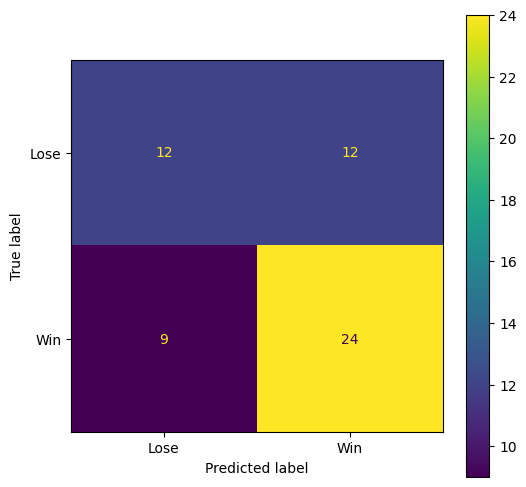

In [38]:
import matplotlib.pyplot as  plt
from sklearn.metrics import  ConfusionMatrixDisplay

plt.figure(figsize=(6,6));
ConfusionMatrixDisplay.from_estimator(lr_gs, X_test,y_test, display_labels=['Lose','Win'], ax=plt.subplot());

Caldrà copiar els coeficients per utilitzar-los en el codi:

Coefs:


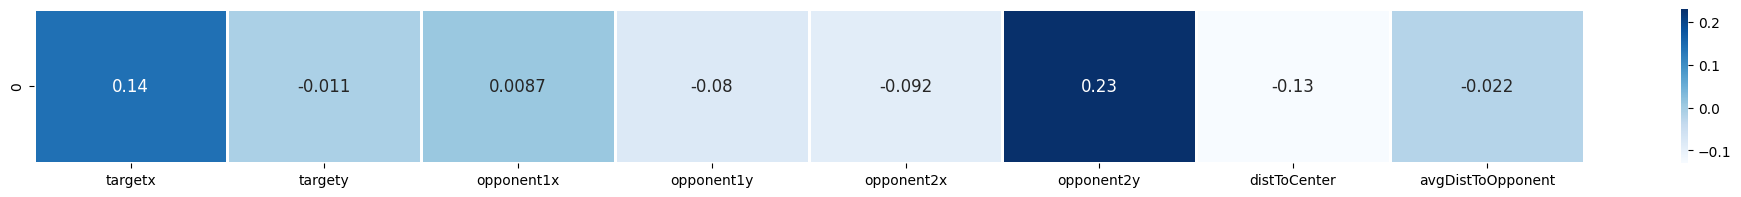

In [39]:
import seaborn as sns

print('Coefs:')
coefs = pd.DataFrame(lr_gs.best_estimator_.coef_)
coefs.columns = X.columns

plt.figure(figsize=(25,2));
sns.heatmap(coefs,annot=True, linewidths=2.0, cbar=True, xticklabels=True, cmap='Blues', annot_kws={'size':12});
plt.savefig('prova.pdf', bbox_inches='tight')

In [40]:
lr_gs.best_estimator_.coef_

array([[ 0.14023988, -0.0107159 ,  0.00870328, -0.08024559, -0.09177372,
         0.2294165 , -0.13016898, -0.02159289]])

In [41]:
log_reg_model.intercept_

array([0.12715054])